In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline


In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [ ]:
df.var()

Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64

In [ ]:
from sklearn.preprocessing import scale
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

In [ ]:
X

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169   
764    -0.547919  0.034598       0.046245       0.405445 -0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594 -0.735190   
766    -0.844885  0.159787      -0.470732      -1.288212 -0.692891 -0.240205   
767    -0.844885 -0.873019       0.046245       0.656358 -0.692891 -0.202129   

     DiabetesPedigreeFunction       Age   Outcome  
0                    0.468492  1.425995  1.365896  
1                   -0.365061 -0.190672 -0.732120  
2                    0.604397 -0.105584  1.365896  
3                   -0.920763 -1.041549 -0.732120  
4                    5.484909 -0.020496  1.365896  
..                        ...       ...       ...  
763                 -0.908682  2.532136 -0.732120  
764                 -0.398282 -0.531023 -0.732120  
765                 -0.685193 -0.275760 -0.732120  
766                 -0.371101  1.170732  1.365896  
767                 -0.473785 -0.871374 -0.732120  

[768 rows x 9 columns]

In [ ]:
from sklearn.decomposition import PCA

pca_loadings = pd.DataFrame(PCA().fit(X).components_.T, index=df.columns, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'])
pca_loadings

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                 -0.215998 -0.527446      -0.164512       0.160883   
Glucose                     -0.436757 -0.095635       0.391417      -0.327123   
BloodPressure               -0.300455 -0.046253      -0.629705       0.011057   
SkinThickness               -0.307292  0.448398      -0.294326       0.074016   
Insulin                     -0.336332  0.355346       0.141653      -0.097635   
BMI                         -0.397342  0.210316      -0.251930      -0.163219   
DiabetesPedigreeFunction    -0.237634  0.175195       0.285325       0.873527   
Age                         -0.278656 -0.533202      -0.126118       0.171112   
Outcome                     -0.415653 -0.154768       0.394615      -0.181674   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.211766  0.456773                  0.078518   
Glucose                   0.108779 -0.382749                 -0.208000   
BloodPressure            -0.059378 -0.607867                  0.326708   
SkinThickness             0.171810  0.397957                  0.281998   
Insulin                   0.650374  0.008730                 -0.082216   
BMI                      -0.527458  0.241008                 -0.572524   
DiabetesPedigreeFunction -0.156555 -0.171628                 -0.057190   
Age                       0.204289 -0.001055                 -0.299428   
Outcome                  -0.377937  0.171379                  0.580378   

                               Age   Outcome  
Pregnancies              -0.540642 -0.265052  
Glucose                   0.025245 -0.581076  
BloodPressure            -0.162800  0.068306  
SkinThickness             0.434914 -0.394770  
Insulin                  -0.268838  0.478451  
BMI                      -0.166463  0.126440  
DiabetesPedigreeFunction -0.093164 -0.049618  
Age                       0.614890  0.288754  
Outcome                   0.068274  0.317562

In [ ]:
# Fit the PCA model and transform X to get the principal components
pca = PCA()
df_plot = pd.DataFrame(pca.fit_transform(X), columns=['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9'], index=X.index)
df_plot.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.756947 -1.111743  0.208791  0.333705 -0.481708  0.433002  0.457659   
1  1.507421  0.559406 -0.650628  0.229934  0.004888  0.119311  0.366468   
2 -0.650822 -1.929576  2.007740 -0.026129 -0.234056 -0.674044  0.721475   
3  1.587398  1.065075 -0.474442 -0.580654  0.297429  0.070897  0.344750   
4 -2.483374  2.359563  2.925515  3.936611 -1.566350  0.200397 -0.815131   

        PC8       PC9  
0  1.124410 -0.493947  
1  0.852443 -0.031324  
2 -0.793359 -1.063704  
3 -0.030624  0.240969  
4  0.398705  0.249165

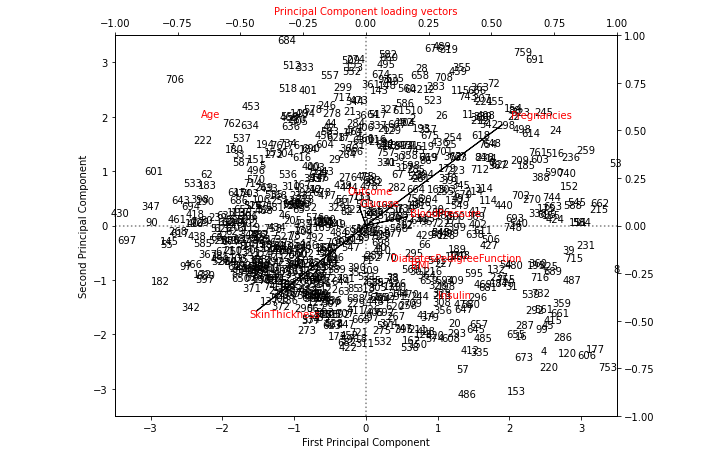

In [ ]:
fig , ax1 = plt.subplots(figsize=(9,7))

ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

# Plot Principal Components 1 and 2
for i in df_plot.index:
    ax1.annotate(i, (-df_plot.PC1.loc[i], -df_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted', colors='grey')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('Principal Component loading vectors', color='red')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['Age', 'Glucose']].index:
    ax2.annotate(i, (-pca_loadings.Age.loc[i]*a, -pca_loadings.Glucose.loc[i]*a), color='red')

# Plot vectors
ax2.arrow(0,0,-pca_loadings.Age[0], -pca_loadings.Glucose[0])
ax2.arrow(0,0,-pca_loadings.Age[1], -pca_loadings.Glucose[1])
ax2.arrow(0,0,-pca_loadings.Age[2], -pca_loadings.Glucose[2])
ax2.arrow(0,0,-pca_loadings.Age[3], -pca_loadings.Glucose[3])

In [ ]:
pca.explained_variance_

array([2.35556873, 1.77662535, 1.12168566, 0.88310476, 0.84572462,
       0.73582635, 0.4890602 , 0.41872635, 0.38541202])

In [ ]:
pca.explained_variance_ratio_

array([0.26138907, 0.19714578, 0.12446946, 0.09799499, 0.09384705,
       0.08165203, 0.05426927, 0.04646457, 0.0427678 ])

In [ ]:
df_plot.isnull().sum()

PC1    0
PC2    0
PC3    0
PC4    0
PC5    0
PC6    0
PC7    0
PC8    0
PC9    0
dtype: int64

In [ ]:
df_plot

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0   -1.756947 -1.111743  0.208791  0.333705 -0.481708  0.433002  0.457659   
1    1.507421  0.559406 -0.650628  0.229934  0.004888  0.119311  0.366468   
2   -0.650822 -1.929576  2.007740 -0.026129 -0.234056 -0.674044  0.721475   
3    1.587398  1.065075 -0.474442 -0.580654  0.297429  0.070897  0.344750   
4   -2.483374  2.359563  2.925515  3.936611 -1.566350  0.200397 -0.815131   
..        ...       ...       ...       ...       ...       ...       ...   
763 -1.283069 -1.211187 -2.049198  0.297979  2.035495  1.605289 -0.393316   
764  0.502281  0.674135 -0.632213 -0.406653 -0.587256 -0.045828 -0.456261   
765  0.574088 -0.033816 -0.419653 -0.352822  0.987909 -0.056389  0.213487   
766  0.172699 -1.322892  1.124947 -0.553883 -0.897811 -0.440987  0.041259   
767  1.321267  1.027489 -0.786445 -0.130567 -0.335029  0.083318  0.351243   

          PC8       PC9  
0    1.124410 -0.493947  
1    0.852443 -0.031324  
2   -0.793359 -1.063704  
3   -0.030624  0.240969  
4    0.398705  0.249165  
..        ...       ...  
763  1.025892  0.196187  
764  0.211213 -0.652209  
765 -0.250994 -0.380918  
766  1.051149  1.035822  
767  0.390949 -0.342393  

[768 rows x 9 columns]

Text(0, 0.5, 'PC1')

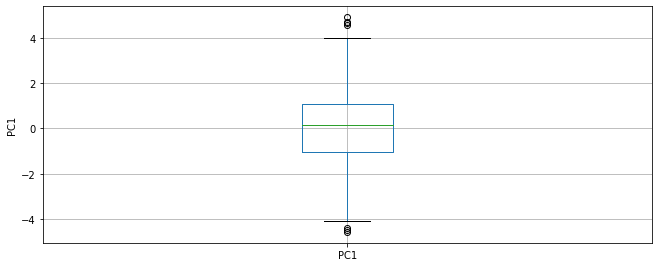

In [ ]:
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df_plot.boxplot(column='PC1')
fig.set_title('')
fig.set_ylabel('PC1')

In [ ]:
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df_plot['PC1'].hist(bins=20)
fig.set_xlabel('PC1')
fig.set_ylabel('PCA')

Text(0, 0.5, 'PCA')

In [ ]:
X = df_plot.drop(['PC2'], axis=1)

y = df_plot['PC2']

In [ ]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
y_train = y_train.reshape(-1, 1)

In [ ]:

X_train.shape, X_test.shape

((614, 8), (154, 8))

In [ ]:
y_train.shape

(614,)

In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
type(y_train)

pandas.core.series.Series

In [ ]:
y_train = pd.DataFrame(y_train)

In [ ]:
type(y_train)

pandas.core.frame.DataFrame

In [ ]:
cols = X_train.columns

In [ ]:
cols

Index(['PC1', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'], dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:

X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])


In [ ]:
X_train.describe()

PC1           PC3           PC4           PC5           PC6  \
count  6.140000e+02  6.140000e+02  6.140000e+02  6.140000e+02  6.140000e+02   
mean   5.243724e-18 -5.297970e-17  2.169817e-17  5.786179e-18  6.075488e-17   
std    1.000815e+00  1.000815e+00  1.000815e+00  1.000815e+00  1.000815e+00   
min   -2.955197e+00 -2.370177e+00 -2.394132e+00 -3.636083e+00 -2.971009e+00   
25%   -6.642823e-01 -6.547851e-01 -6.636985e-01 -5.551646e-01 -6.678804e-01   
50%    1.101952e-01 -6.331317e-02 -1.408705e-01 -1.171916e-02 -4.395365e-02   
75%    7.042089e-01  4.642899e-01  4.658003e-01  5.302887e-01  5.481521e-01   
max    3.224421e+00  3.952605e+00  4.164795e+00  4.842614e+00  4.580647e+00   

                PC7           PC8           PC9  
count  6.140000e+02  6.140000e+02  6.140000e+02  
mean   1.410381e-17 -1.446545e-18  1.005801e-17  
std    1.000815e+00  1.000815e+00  1.000815e+00  
min   -3.718945e+00 -2.786140e+00 -3.781264e+00  
25%   -6.262320e-01 -5.914255e-01 -5.171912e-01  
50%    7.438527e-02 -3.500141e-02 -4.233412e-02  
75%    6.501564e-01  5.511649e-01  5.284938e-01  
max    4.041137e+00  6.410153e+00  4.945519e+00

In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [ ]:
df = df_plot

In [ ]:
df.describe()

PC1           PC2           PC3           PC4           PC5  \
count  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02   
mean   2.052756e-17  4.163336e-17 -8.514601e-17  2.847838e-17 -3.245379e-17   
std    1.534786e+00  1.332901e+00  1.059097e+00  9.397365e-01  9.196329e-01   
min   -4.572514e+00 -3.685373e+00 -2.947903e+00 -2.291056e+00 -3.397168e+00   
25%   -1.038328e+00 -9.367786e-01 -6.783248e-01 -6.285024e-01 -5.132885e-01   
50%    1.604564e-01  1.110725e-01 -6.731624e-02 -1.283792e-01 -1.358697e-03   
75%    1.076681e+00  9.958722e-01  5.159094e-01  4.511559e-01  4.891826e-01   
max    4.911349e+00  3.718984e+00  4.163647e+00  3.936611e+00  4.527445e+00   

                PC6           PC7           PC8           PC9  
count  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02  
mean  -1.333569e-17 -2.009388e-17  3.129730e-17 -5.182486e-17  
std    8.578032e-01  6.993284e-01  6.470907e-01  6.208156e-01  
min   -2.549679e+00 -2.635742e+00 -1.808216e+00 -2.341844e+00  
25%   -5.695455e-01 -4.464886e-01 -3.855198e-01 -3.184634e-01  
50%   -4.172298e-02  4.157467e-02 -2.259610e-02 -2.327860e-02  
75%    4.736901e-01  4.513336e-01  3.492248e-01  3.410631e-01  
max    3.971247e+00  2.848092e+00  4.187399e+00  3.122613e+00

In [ ]:
target_column = ['PC1'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

PC1           PC2           PC3           PC4           PC5  \
count  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02   
mean   2.052756e-17  1.134798e-17 -1.170938e-17  1.077878e-17 -2.168404e-18   
std    1.534786e+00  3.584046e-01  2.543675e-01  2.387171e-01  2.031240e-01   
min   -4.572514e+00 -9.909623e-01 -7.080098e-01 -5.819868e-01 -7.503499e-01   
25%   -1.038328e+00 -2.518910e-01 -1.629160e-01 -1.596557e-01 -1.133727e-01   
50%    1.604564e-01  2.986636e-02 -1.616762e-02 -3.261159e-02 -3.001024e-04   
75%    1.076681e+00  2.677807e-01  1.239081e-01  1.146051e-01  1.080483e-01   
max    4.911349e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

                PC6           PC7           PC8           PC9  
count  7.680000e+02  7.680000e+02  7.680000e+02  7.680000e+02  
mean   3.117081e-19 -3.848918e-18  1.174552e-18 -1.861214e-17  
std    2.160035e-01  2.455428e-01  1.545329e-01  1.988129e-01  
min   -6.420348e-01 -9.254415e-01 -4.318232e-01 -7.499629e-01  
25%   -1.434173e-01 -1.567676e-01 -9.206666e-02 -1.019862e-01  
50%   -1.050627e-02  1.459738e-02 -5.396213e-03 -7.454848e-03  
75%    1.192799e-01  1.584688e-01  8.339898e-02  1.092236e-01  
max    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00

In [ ]:
X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape);print(y_train.shape)

(537, 8)
(231, 8)
(537, 1)


In [ ]:
y_train

array([[-1.55803063e+00],
       [-2.05212047e+00],
       [-3.08282605e+00],
       [ 1.22840349e+00],
       [-6.68986115e-02],
       [ 1.67468465e+00],
       [-9.36346205e-02],
       [ 3.58302162e+00],
       [-1.86097706e-01],
       [-2.04980732e-01],
       [-2.23182194e-01],
       [ 5.96169951e-01],
       [-7.53925158e-01],
       [ 2.63388851e+00],
       [ 8.75959562e-01],
       [-2.21400708e+00],
       [-1.80510175e+00],
       [-6.91362555e-01],
       [ 2.06944859e+00],
       [ 1.54259731e+00],
       [ 1.79641237e+00],
       [ 1.50142757e+00],
       [ 1.91834870e-01],
       [ 9.36641440e-02],
       [ 1.16378158e+00],
       [-6.50822009e-01],
       [ 1.73167750e+00],
       [-3.19361860e+00],
       [ 1.13779823e+00],
       [ 8.38631844e-01],
       [-9.62958060e-01],
       [ 1.02766820e+00],
       [-2.82507716e+00],
       [ 6.04145810e-01],
       [-2.09487017e+00],
       [-5.13758391e-01],
       [ 4.65279355e-01],
       [-7.27639653e-01],
       [ 1.2

In [ ]:
y_train = np.array(y_train).flatten().tolist()

In [ ]:
y_train

[-1.558030634116336,
 -2.052120474469122,
 -3.0828260532086103,
 1.2284034858328297,
 -0.06689861153091539,
 1.674684648823633,
 -0.09363462049060468,
 3.5830216187702146,
 -0.18609770637749995,
 -0.20498073184345067,
 -0.22318219426538638,
 0.5961699514981329,
 -0.7539251577765891,
 2.633888510208938,
 0.8759595622803353,
 -2.2140070803091034,
 -1.8051017538712224,
 -0.6913625554413736,
 2.0694485916091874,
 1.5425973067215675,
 1.796412369078538,
 1.5014275713202432,
 0.1918348700252514,
 0.09366414399623618,
 1.1637815797127327,
 -0.6508220089175258,
 1.7316774953407177,
 -3.1936186029035607,
 1.1377982292965985,
 0.8386318439947206,
 -0.9629580598579206,
 1.027668204675723,
 -2.825077162233703,
 0.6041458097017748,
 -2.094870172324801,
 -0.5137583910584688,
 0.46527935453679026,
 -0.7276396531935257,
 1.226274236592449,
 -1.1783287036340502,
 1.5297418671922438,
 -0.837300332594267,
 2.419823338801337,
 -0.10856728791406894,
 0.1463185714165017,
 3.973771312721879,
 1.2917932769949

In [ ]:
X_train

array([[ 0.00803278,  0.09894644,  0.11114191, ...,  0.38544646,
        -0.07448893, -0.19765881],
       [ 0.02465087,  0.02440373, -0.12268283, ..., -0.02866381,
        -0.02804098, -0.32503907],
       [ 0.65455083, -0.08786758, -0.19160898, ...,  0.09886781,
        -0.10095918,  0.16992605],
       ...,
       [-0.37370601, -0.24642832,  0.68232532, ..., -0.62864809,
        -0.21688449, -0.15277388],
       [-0.40083025, -0.02494617,  0.09126489, ..., -0.02262709,
         0.31579519, -0.17655754],
       [ 0.30845351,  0.1030702 ,  0.06762336, ...,  0.21070392,
         0.18878598,  0.01510815]])

In [ ]:
X_test = scaler.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[ 0.57106081, -0.22167266, -0.20968899, ...,  0.19293075,
        -0.02801855,  0.05195996]])

In [ ]:
X_train = np.array(X_train).flatten().tolist()

In [ ]:
X_test = np.array(X_test).flatten().tolist()

In [ ]:
X_train

[0.008032780139844275,
 0.09894644313082859,
 0.11114190930119955,
 -0.05608105307329577,
 -0.11052580725557314,
 0.38544646075931494,
 -0.07448893024199822,
 -0.19765881105646085,
 0.02465086636064761,
 0.02440372712928155,
 -0.12268282975532623,
 0.02884920974902552,
 0.30171119864650064,
 -0.02866380602956193,
 -0.028040980260566277,
 -0.32503907408811444,
 0.6545508295133533,
 -0.0878675797342068,
 -0.19160897798302678,
 -0.04100835440716062,
 0.3681175823146901,
 0.09886780744292195,
 -0.10095917848445503,
 0.16992605074562986,
 0.3362874121579999,
 0.14383660088577196,
 0.08164920608134588,
 -0.15354343143614066,
 -0.249102393459723,
 -0.025504531896576987,
 -0.006683591285694612,
 -0.09883155012175264,
 -0.6866008433406345,
 0.26035850975818453,
 -0.22475230338087365,
 0.1303704221535057,
 -0.027952461121933975,
 -0.5209959424616154,
 -0.02636826879179094,
 -0.11151009291703787,
 0.17835034860842788,
 -0.028047137734713515,
 -0.0845359285159372,
 -0.03894390294109109,
 0.0386337

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)

In [ ]:
X_train = X_train.reshape(1, -1)

In [ ]:
y_train = y_train.reshape(1, -1)

In [ ]:
X_test = X_test.reshape(1, -1)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)



In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(predict_train)    # initialise a matrix full with zeros
y_pred_classes[predict_train > cutoff] = 1       # add a 1 if the cutoff was breached

In [ ]:
y_test_classes = np.zeros_like(predict_train)
y_test_classes[y_train > cutoff] = 1